In [1]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np # mathematical essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File path
file = "./birthweight_low.xlsx"

# Read df
birthWeight = pd.read_excel(io = file, sheet_name = 0, header = 0)

print(birthWeight.shape)

# Prefer
birthWeight.head(n = 10)

(196, 18)


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ["mage", "npvis", "fage", "feduc", "cigs", "drink", "bwght", "omaps", "fmaps"]

# developing a correlation matrix based on continuous features
birthWeight_corr = birthWeight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthWeight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
omaps    0.25
fmaps    0.25
feduc    0.14
npvis    0.06
fage    -0.40
mage    -0.46
cigs    -0.57
drink   -0.74
Name: bwght, dtype: float64

In [3]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """bwght ~ mage""",
                        data = birthWeight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     53.17
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           7.57e-12
Time:                        12:05:26   Log-Likelihood:                -1522.4
No. Observations:                 196   AIC:                             3049.
Df Residuals:                     194   BIC:                             3055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4509.0849    166.279     27.118      0.0

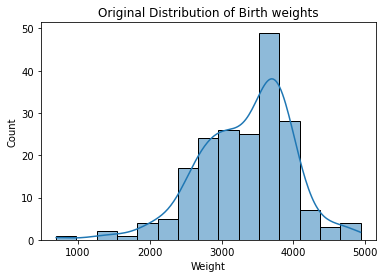

In [4]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthWeight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth weights")
plt.xlabel(xlabel = "Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [5]:
# log transforming Sale_Price and saving it to the dataset
birthWeight['log_bwght'] = np.log(birthWeight['bwght'])

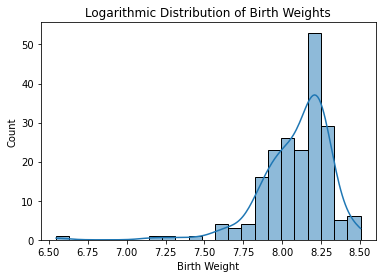

In [6]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthWeight,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weights")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

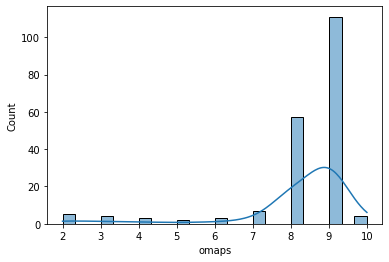

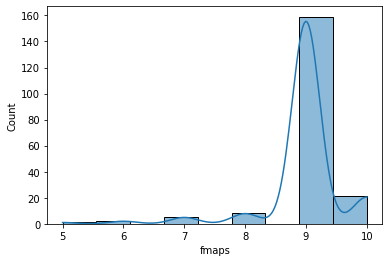

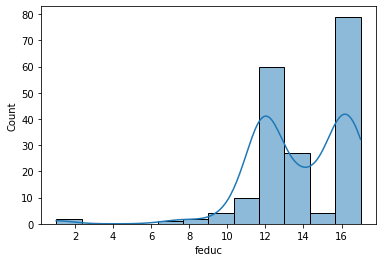

In [7]:
# histogram for omaps (skewed Negative)
sns.histplot(data   = birthWeight,
             x      = 'omaps',
             kde    = True)


# rendering the plot
plt.show()


# histogram for fmaps (skewed Negative)
sns.histplot(data   = birthWeight,
             x      = 'fmaps',
             kde    = True)


# rendering the plot
plt.show()


# histogram for feduc (skewed Negative)
sns.histplot(data   = birthWeight,
             x      = 'feduc',
             kde    = True)


# rendering the plot
plt.show()

In [8]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
birthWeight.isnull().sum(axis = 0)

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
dtype: int64

In [9]:
# looping to detect features with missing values
for col in birthWeight:

    # creating columns with 1s if missing and 0 if not
    if birthWeight[col].isnull().astype(int).sum() > 0:
        birthWeight['m_'+col] = birthWeight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthWeight[['m_meduc', 'm_npvis', 'm_feduc']].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [10]:
# Filling in missing values
birthWeight['meduc'].fillna(value = birthWeight['meduc'].median(), inplace = True)
birthWeight['npvis'].fillna(value = birthWeight['npvis'].median(), inplace = True)
birthWeight['feduc'].fillna(value = birthWeight['feduc'].median(), inplace = True)

In [11]:
# making sure all missing values have been taken care of
birthWeight.isnull().any().any()

False

In [12]:
# log transforming omaps and saving it to the dataset
birthWeight['log_omaps'] = np.log(birthWeight['omaps'])

# log transforming fmaps and saving it to the dataset
birthWeight['log_fmaps'] = np.log(birthWeight['fmaps'])

# log transforming fmaps and saving it to the dataset
birthWeight['log_feduc'] = np.log(birthWeight['feduc'])

In [13]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_bwght ~ omaps""",
                        data = birthWeight)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     21.23
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           7.36e-06
Time:                        12:05:27   Log-Likelihood:                 18.714
No. Observations:                 196   AIC:                            -33.43
Df Residuals:                     194   BIC:                            -26.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7097      0.084     92.019      0.0

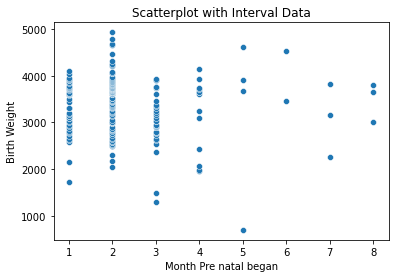

In [14]:
# developing a scatterplot
sns.scatterplot(x    = 'monpre',
                y    = 'bwght',
                data = birthWeight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Month Pre natal began')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.show()

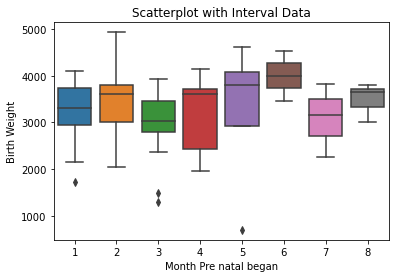

In [15]:
# developing a scatterplot
sns.boxplot(x    = 'monpre',
                y    = 'bwght',
                data = birthWeight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Month Pre natal began')
plt.ylabel(ylabel = 'Birth Weight')


# displaying the plot
plt.show()

In [16]:
birthWeight['log_monpre'] = np.log(birthWeight['monpre'])


log_corr = birthWeight.loc[ : , ['monpre',
                             'log_monpre',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['monpre', 'log_monpre'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
monpre,-0.05,-0.09
log_monpre,-0.06,-0.09


In [17]:
# dropping categorical variables
birthWeight = birthWeight.drop('moth', axis = 1)
birthWeight = birthWeight.drop('foth', axis = 1)

In [18]:
# creating a (Pearson) correlation matrix
df_corr = birthWeight.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght         1.00
log_bwght     0.97
log_omaps     0.26
log_fmaps     0.26
omaps         0.25
fmaps         0.25
log_feduc     0.16
feduc         0.13
mblck         0.13
fblck         0.12
male          0.11
meduc         0.09
m_npvis       0.06
npvis         0.06
m_feduc      -0.00
fwhte        -0.04
monpre       -0.05
log_monpre   -0.06
mwhte        -0.11
m_meduc      -0.13
fage         -0.40
mage         -0.46
cigs         -0.57
drink        -0.74
Name: bwght, dtype: float64


In [19]:
# preparing explanatory variable data
birthWeight_data   = birthWeight.drop(['bwght',
                               'log_bwght'],
                                axis = 1)


# preparing response variable data
birthWeight_target = birthWeight.loc[ : , 'bwght']
log_birthWeight_target = birthWeight.loc[ : , 'log_bwght'] # ready for use later


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthWeight_data,
            birthWeight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 22)
y-side: 147


Testing Data
------------
X-side: (49, 22)
y-side: 49



In [20]:
# OLS: declaring set of x-variables
x_variables = ["log_omaps", "log_fmaps", "log_feduc", "mblck", "fblck", "male", 
                "meduc", "npvis", "m_npvis", "m_feduc", 
                "fwhte", "log_monpre", "mwhte", "m_meduc", 
                "fage", "mage", "cigs", "drink"]


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_omaps +
log_fmaps +
log_feduc +
mblck +
fblck +
male +
meduc +
npvis +
m_npvis +
m_feduc +
fwhte +
log_monpre +
mwhte +
m_meduc +
fage +
mage +
cigs +
drink +


In [21]:
# merging X_train and y_train so that they can be used in statsmodels
birthWeight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ log_omaps +
                                        log_fmaps +
                                        log_feduc""",
                                data = birthWeight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()


# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     7.047
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           0.000188
Time:                        12:05:27   Log-Likelihood:                -1154.5
No. Observations:                 147   AIC:                             2317.
Df Residuals:                     143   BIC:                             2329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1567.3892   1567.334     -1.000      0.3

In [22]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = birthWeight.loc[ : , x_variables]


# Preparing the target variable
birthWeight_target = birthWeight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthWeight_data,     # x-variables
            birthWeight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthWeight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [23]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7518
OLS Testing Score  : 0.5843
OLS Train-Test Gap : 0.1675


In [24]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthWeight[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2332.51)
('log_omaps', -4.1)
('log_fmaps', 712.71)
('log_feduc', 168.77)
('mblck', -113.69)
('fblck', 217.65)
('male', 66.39)
('meduc', 33.67)
('npvis', 5.63)
('m_npvis', 668.23)
('m_feduc', 324.19)
('fwhte', -23.09)
('log_monpre', 30.19)
('mwhte', 160.39)
('m_meduc', -595.36)
('fage', -1.88)
('mage', -15.18)
('cigs', -39.29)
('drink', -96.01)


In [25]:
import sklearn.linear_model # linear models

# INSTANTIATING a Lasso model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7431
Lasso Testing Score  : 0.6326
Lasso Train-Test Gap : 0.1105


In [26]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthWeight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3669.47)
('mage', -13.7)
('meduc', 17.85)
('monpre', 0.0)
('npvis', 1.65)
('fage', -2.45)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 76.89)
('cigs', -37.93)
('drink', -98.5)
('male', 45.36)
('mwhte', 35.7)
('mblck', 19.44)
('fwhte', -0.0)
('fblck', 7.55)
('m_meduc', -239.38)
('m_npvis', 359.38)
('m_feduc', 0.0)
('log_omaps', 0.0)
('log_fmaps', 0.0)
('log_feduc', 108.39)
('log_monpre', 0.0)


In [27]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3669.47)
('mage', -13.7)
('meduc', 17.85)
('npvis', 1.65)
('fage', -2.45)
('omaps', 0.0)
('fmaps', 76.89)
('cigs', -37.93)
('drink', -98.5)
('male', 45.36)
('mwhte', 35.7)
('mblck', 19.44)
('fblck', 7.55)
('m_meduc', -239.38)
('m_npvis', 359.38)
('log_omaps', 0.0)
('log_feduc', 108.39)


In [28]:
# INSTANTIATING an ARD model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7362
Testing Score : 0.6462
ARD Train-Test Gap : 0.09


In [29]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthWeight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3911.06)
('mage', -15.60758)
('meduc', 13.52821)
('monpre', 0.0001)
('npvis', 0.00173)
('fage', -0.00828)
('feduc', 0.00132)
('omaps', 0.00034)
('fmaps', 73.53692)
('cigs', -39.35309)
('drink', -102.61335)
('male', 12.80777)
('mwhte', 0.00119)
('mblck', 0.00081)
('fwhte', 0.00015)
('fblck', 0.00091)
('m_meduc', -147.03679)
('m_npvis', 297.41901)
('m_feduc', 0.00018)
('log_omaps', 0.0004)
('log_fmaps', 0.00079)
('log_feduc', 77.87912)
('log_monpre', 0.00029)


In [30]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3911.06)
('mage', -15.60758)
('meduc', 13.52821)
('monpre', 0.0001)
('npvis', 0.00173)
('fage', -0.00828)
('feduc', 0.00132)
('omaps', 0.00034)
('fmaps', 73.53692)
('cigs', -39.35309)
('drink', -102.61335)
('male', 12.80777)
('mwhte', 0.00119)
('mblck', 0.00081)
('fwhte', 0.00015)
('fblck', 0.00091)
('m_meduc', -147.03679)
('m_npvis', 297.41901)
('m_feduc', 0.00018)
('log_omaps', 0.0004)
('log_fmaps', 0.00079)
('log_feduc', 77.87912)
('log_monpre', 0.00029)


In [31]:
# comparing results

print(f"""
Model         Train Score      Test Score      Train-Test Gap
-----         -----------      ----------      --------------
OLS           {lr_train_score}           {lr_test_score}          {lr_test_gap}
Lasso         {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
ARD - FINAL   {ard_train_score}           {ard_test_score}          {ard_test_gap}
""")



Model         Train Score      Test Score      Train-Test Gap
-----         -----------      ----------      --------------
OLS           0.7518           0.5843          0.1675
Lasso         0.7431           0.6326          0.1105
ARD - FINAL   0.7362           0.6462          0.09

